<a href="https://colab.research.google.com/github/mugorunen/Edge_Detection_Methods/blob/main/Assignment_Head_direction_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A neural network for head direction system

To keep the egocentric head direction information, theoretical neuroscientists predict a group of neurons in the brain indicating the current head direction. With noting this neural population as head-direction neurons, each head-direction neuron has an intristic tunned direction, which means this neuron will be activited when the animal is heading closely to its tunned direction (see in figure A: Capture.png).

<img src='https://github.com/MScNE-LSMLSDA/2023_ringattractor-mugorunen/blob/main/Capture.PNG?raw=1'>

Besides, to maintain a robust representation of head direction, the head direction network is supposed to have the following properties:

1) The head direction representation is stable without external inputs.
1) The head direction network can continuously represent head direction and dynamically update its state in response to the animal's movement.

To achieve such an efficient and robust representation, a connection pattern in Figure B is proposed. A head direction neuron uniformly inhibits all other neurons; however, it strongly excites the neurons with a similar preferred tuned angle of head direction.

In this way, this network is difficult to be influenced by noise, as only the strongest activation, i.e., the bump of heading direction, can remain stable. Noise will be canceled out by the overall inhibition of all neurons.

Moreover, the network connection actually defines a dynamic system. With an initial representation of head direction neurons, the representation can be iterated based on the connection matrix. According to Lyapunov stability theory, the minimum energy points (attractors) of this system form a continuous ring, which is a continuous representation of directions (see Figure C). Therefore, given any initial representation of this network, the head direction network can always converge to one point on the ring, providing the current head direction of the animal. Additionally, the system state can move along the ring structure smoothly due to the ring attractor structure.

For more information of head direction network, read this paper: https://www.science.org/doi/full/10.1126/science.aal4835.

**In this assignment, we focus on the following question:**

**how to visualize the intrinstic ring structure of head direction neurons from time series data.**

Firstly, let's generate the time traces of neuron activities.

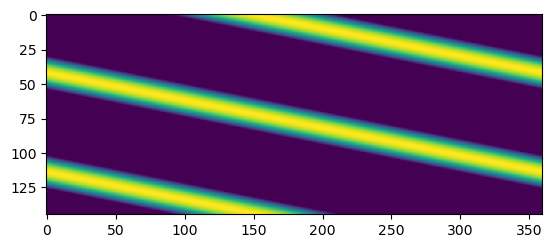

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[90:210] = np.sin(np.arange(120)/120*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,5)
neural_traces_120_2circle = np.array(process)
plt.imshow(neural_traces_120_2circle)

Here, let's assume we have 360 neurons, neurons with index 0,1,2,3,..,359 prefer the head direction of 0,1,2,3,...,359. The direction angles of 0, 90, 180, 270 mean forward, left, backward, right, respectively.Each neuron has a sinusoidal tuning curve with the width of 120 degrees.

In time 0, the current heading direction of the animal is 150 degree. Therefore, the neuron activation of the neuron preferred 150 is 1, the neurons preferred 120 or 180 is 0.5 etc.

From time step 1 to time step 144, the animal rotate in the counter-clockwise direction for 5 degrees each time step. After rotating for 2 circles, the animal stop moving.

**Now lets try to find the intristic ring structure of the neural population by PCA**

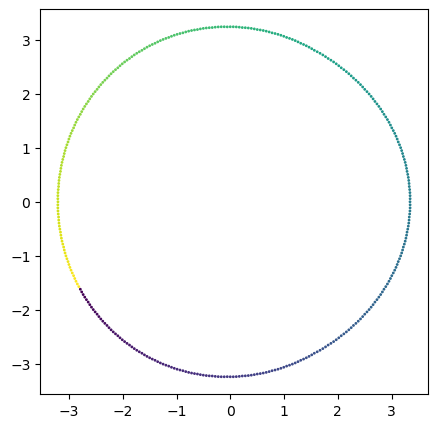

In [ ]:
# You are free to use sklearn


# plot the projections on the two first PCs to visualize the neural traces, each point represent 1 neuron.
# colormap for the preferred directions of neurons form 1 to 360



Here we can see,

**1) our 360 head direction neurons form a ring structure in the PC space.**  
**2) The neurons preferred close directions are placed near to each other.**

This is caused by the connection pattern of the head direction network. The specific connection pattern makes the system state always locate in the ring attractor.

### Here are the questions:

**1) why we use the first 2 PCs for the dimensionality reduction.**  
**Why neurons with similiar preferred direction are projected near to each other.**

**2) Imagine a new animal: the width of tuning curve of this animal is only 30 degree. This animal also rotates 2 circles from the 150 degree. Could you try to identify the ring structure of this animal?**  
Hint: use nonlinear method if PCA cannot work well.

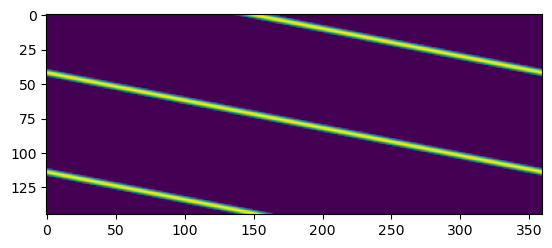

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[135:165] = np.sin(np.arange(30)/30*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,5)
neural_traces_30_2circle = np.array(process)
plt.imshow(neural_traces_30_2circle)

In [ ]:
# plot the projections on the two first PCs to visualize the neural traces, each point represent 1 neuron.
# colormap for the preferred directions of neurons form 1 to 360

# What is the difference with the first plot ?



In [ ]:
# Make the same plot but this time using two first projections from  Locally Linear Embeddings (sklearn as well )


**3) Go back to the first animal, this animal still rotates towards the counter clockwise direction. However, the rotating amplitute of each time step is randomlized. Could you try to identify the ring structure of this animal? Try both linear and nonlinear methods.**  

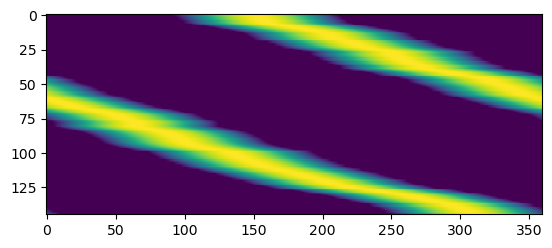

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[90:210] = np.sin(np.arange(120)/120*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,np.abs(int(np.random.normal(0,5,1))))
neural_traces_120_random = np.array(process)
plt.imshow(neural_traces_120_2circle)

In [ ]:
# linear case

In [ ]:
# Nonlinear case

**4) Explain why linear methods and nonlinear methods have different performace in question 2 and question 3**